float64    70
object     37
int64       4
Name: count, dtype: int64


<Axes: ylabel='count'>

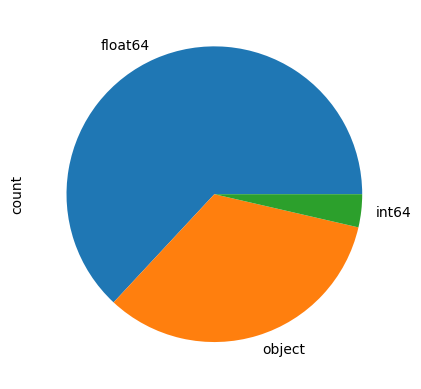

In [4]:

########### Subject : regrouper les clients en fonction de leur comportement d'achtat
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
# Read the CSV file into a DataFrame



data= pd.read_excel('C:/Users/Eddebi/Desktop/projet-final-jaziri/wholesale+customers/dataset.xlsx')
pd.set_option('display.max_rows', 111)  # Nombre max de lignes
pd.set_option('display.max_columns', 111)  # Nombre max de colonnes
##### Analyse du forme 
df=data.copy()
print(df.dtypes.value_counts())

df.dtypes.value_counts().plot.pie()



In [5]:
# d'apres l'analyse on vas que la partie droit elle est presque vide alors on vas eliminer pour aprer car elle sera a rien 


<Axes: >

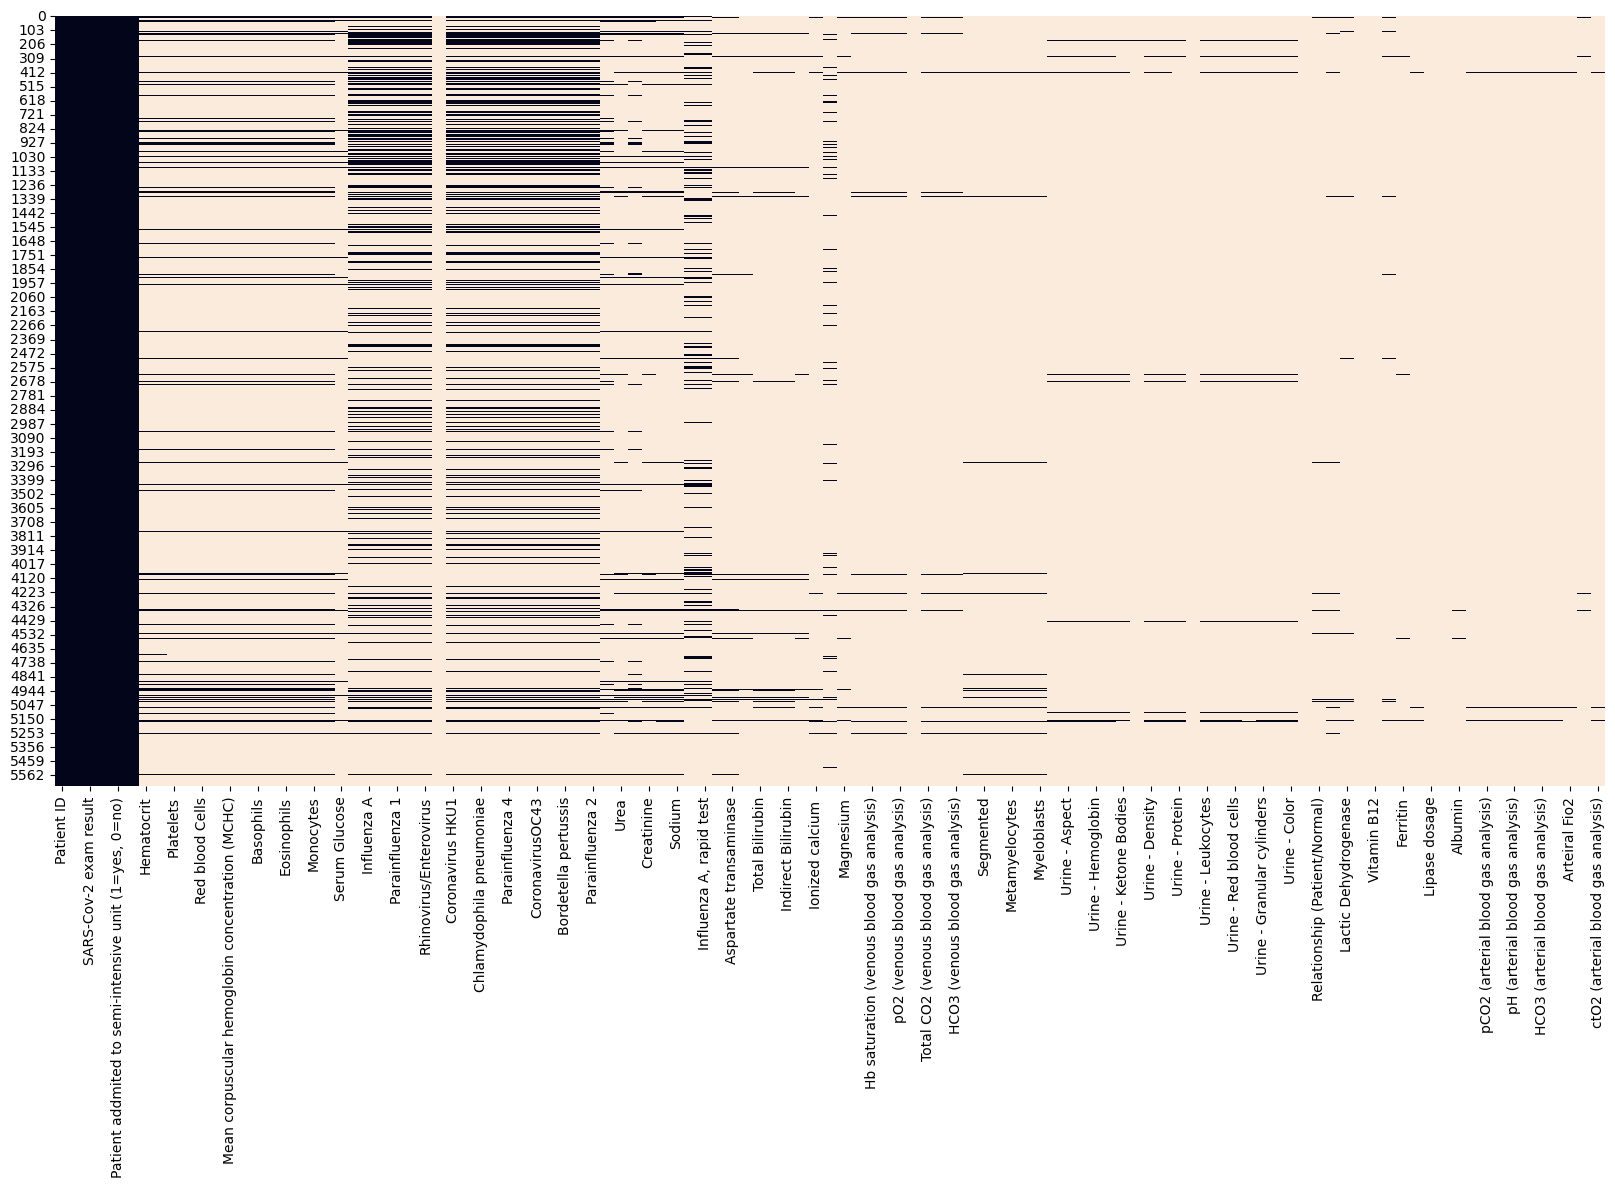

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
#noir=valeur
#blanc = nan 

In [7]:
(df.isna().sum()/df.shape[0]).sort_values()
# ce qui'il sont le meme pourcentage crée une ligne dans l'image

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [8]:
# analyse du data et nettoyage (elimination les variable quil sont de 90 pour cent de variable monquant
missing_percentage = df.isna().sum() / df.shape[0]

# Identify columns with >= 90% missing values
columns_to_drop = missing_percentage[missing_percentage >= 0.9].index

# Drop those columns
df = df.drop(columns=columns_to_drop)

In [9]:
print(df.shape)
# on va passer de 111 variable a 39 variable du coup 72 eliminer 

(5644, 39)


<Axes: >

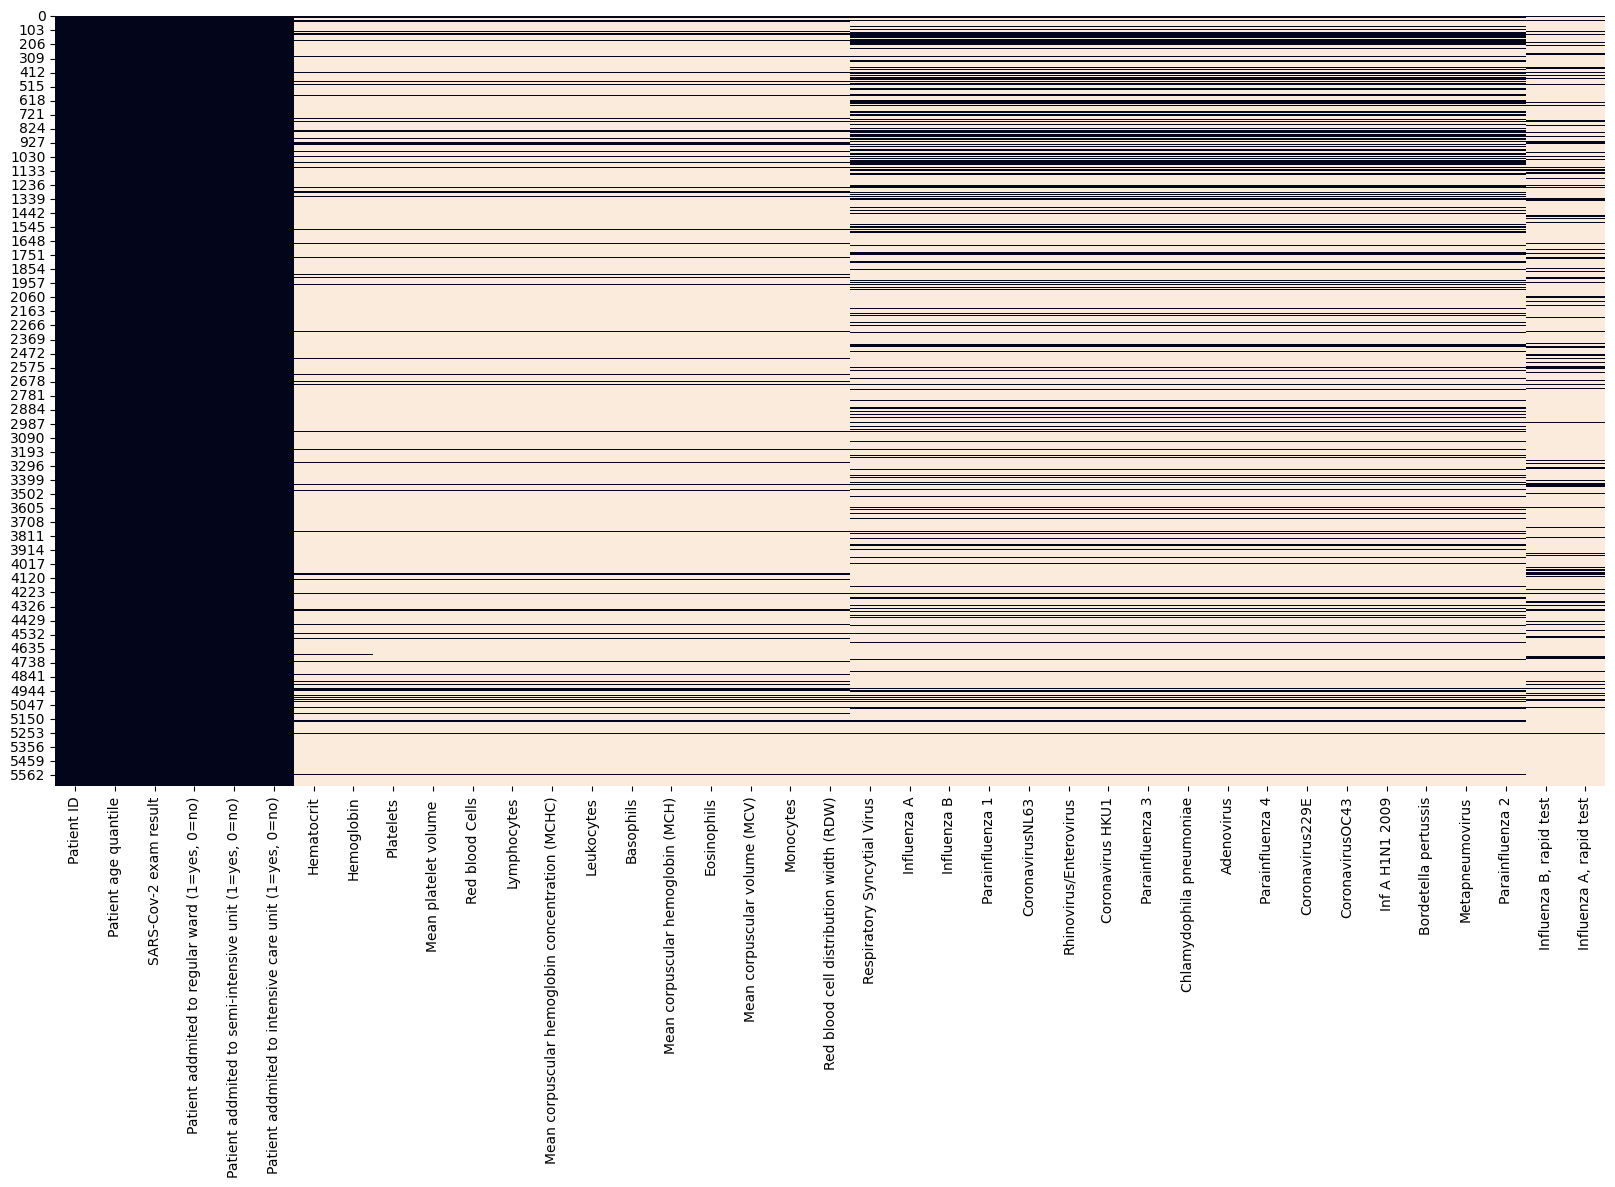

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [11]:
# on va eliminer passient id car on a pas besoin c'eest just un id 
(df.isna().sum()/df.shape[0]).sort_values()


Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Influenza B                                              0.760099
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Metapneumovirus                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

In [12]:
#visualtion target = result +++SARS-Cov-2 exam result 
# 5086 negative et 558 positive 10 pour centage true
df['SARS-Cov-2 exam result'].value_counts(normalize=True)
print(df.dtypes.value_counts())

object     21
float64    14
int64       4
Name: count, dtype: int64


<Axes: ylabel='count'>

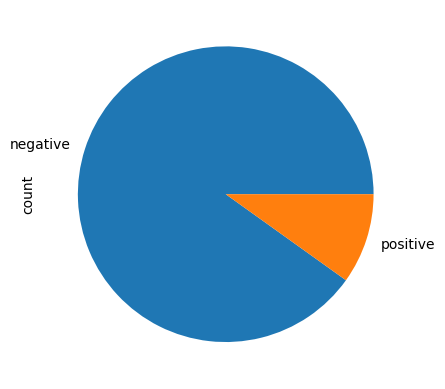

In [13]:
df['SARS-Cov-2 exam result'].value_counts().plot.pie()

C:\Users\Eddebi\AppData\Local\Temp\ipykernel_2412\616651329.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

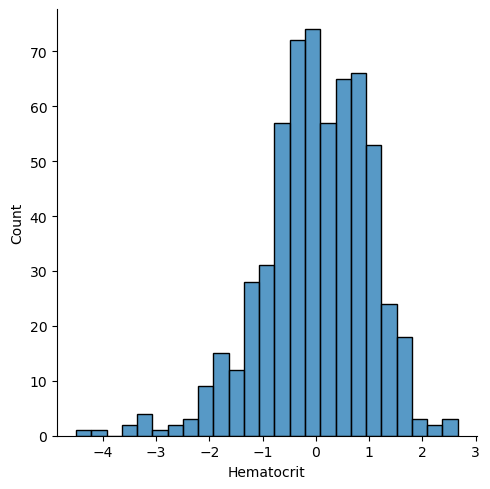

<Figure size 640x480 with 0 Axes>

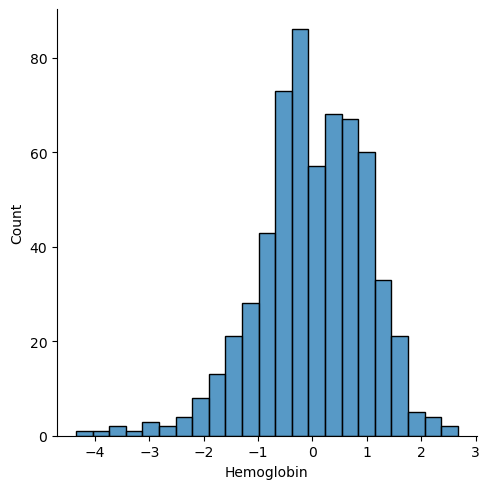

<Figure size 640x480 with 0 Axes>

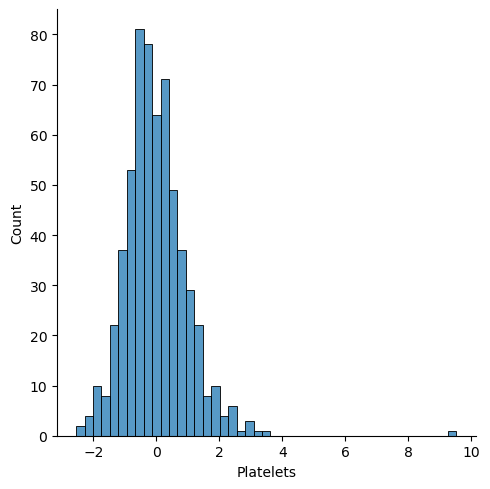

<Figure size 640x480 with 0 Axes>

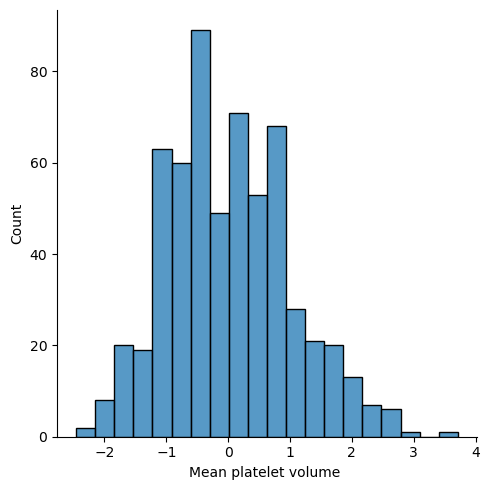

<Figure size 640x480 with 0 Axes>

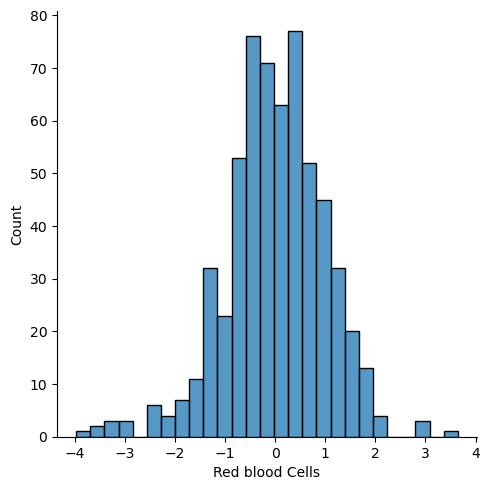

<Figure size 640x480 with 0 Axes>

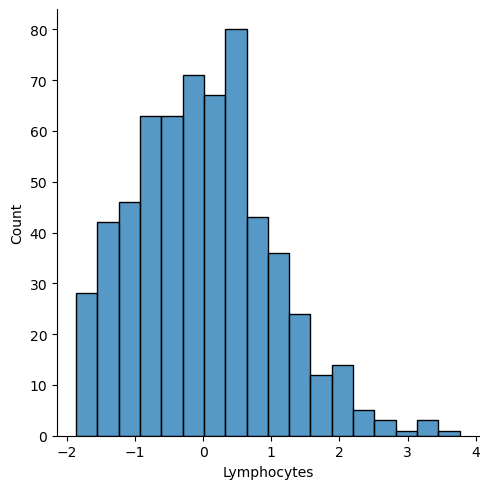

<Figure size 640x480 with 0 Axes>

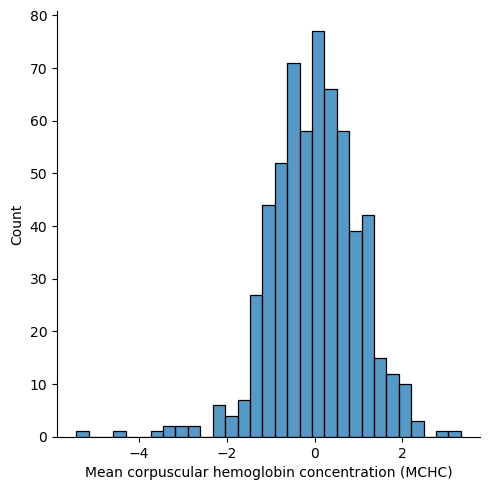

<Figure size 640x480 with 0 Axes>

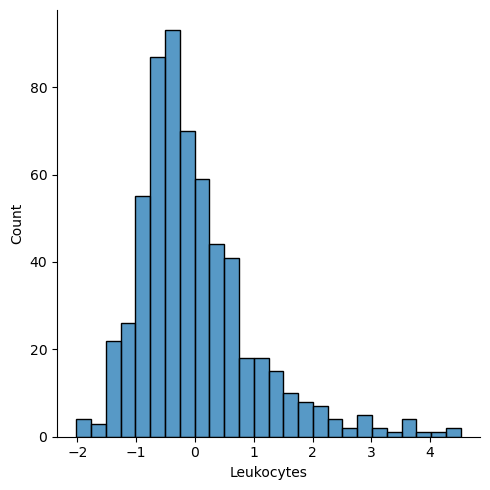

<Figure size 640x480 with 0 Axes>

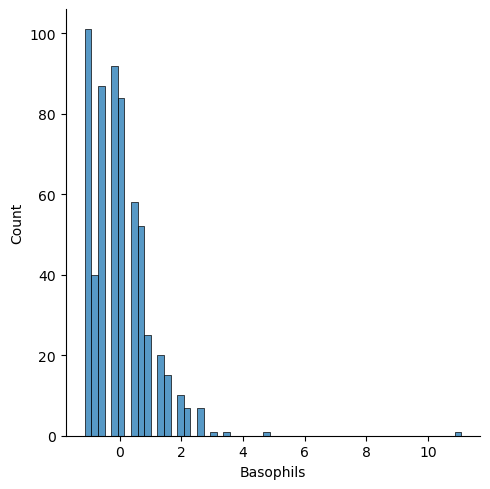

<Figure size 640x480 with 0 Axes>

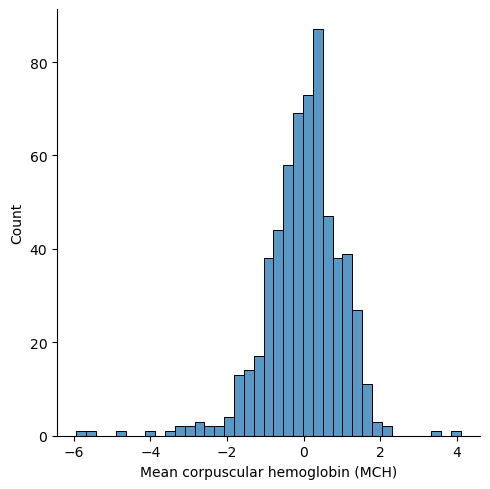

<Figure size 640x480 with 0 Axes>

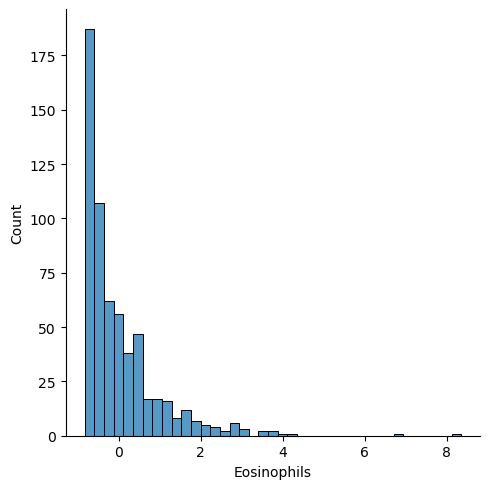

<Figure size 640x480 with 0 Axes>

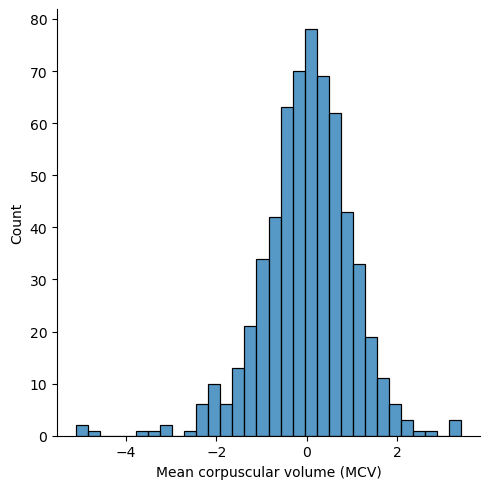

<Figure size 640x480 with 0 Axes>

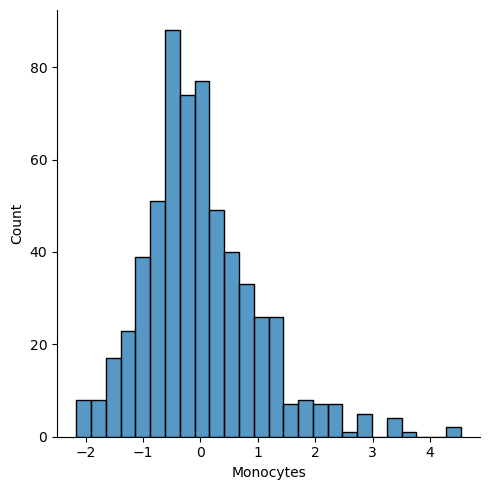

<Figure size 640x480 with 0 Axes>

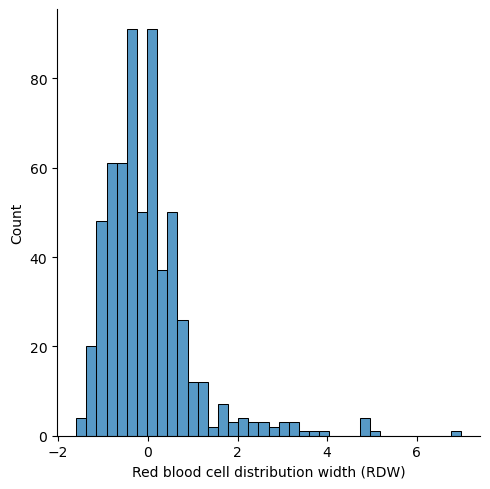

In [14]:
# histogramme de variable continue 
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

In [15]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

# on vois que c'est des variable biniaire parainfluenza ne sert a rien car il donne juste une valeur


Patient ID---------------------------------------- ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus--

C:\Users\Eddebi\AppData\Local\Temp\ipykernel_2412\1189868890.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


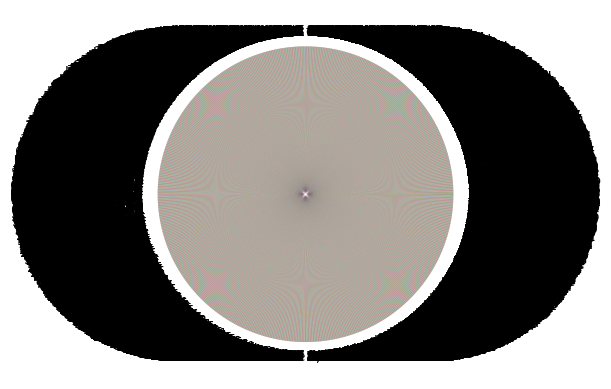

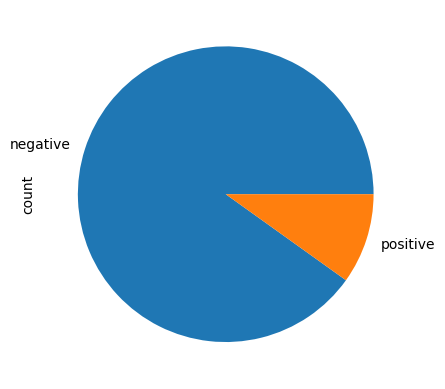

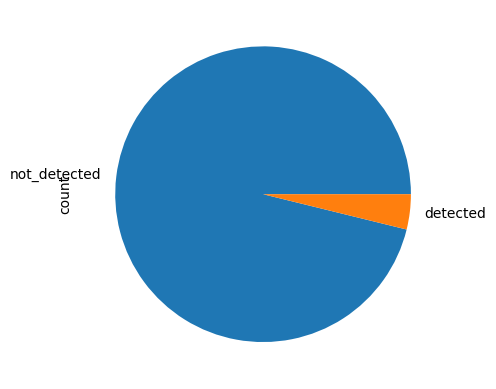

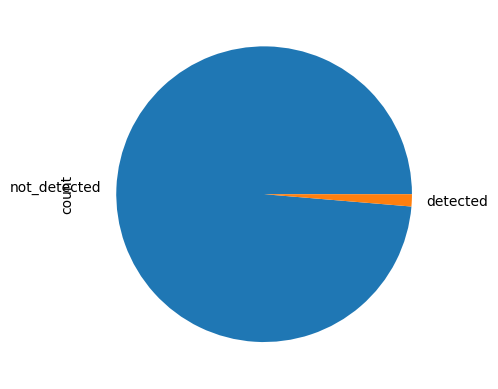

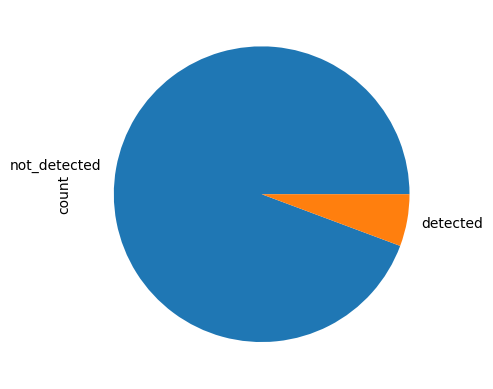

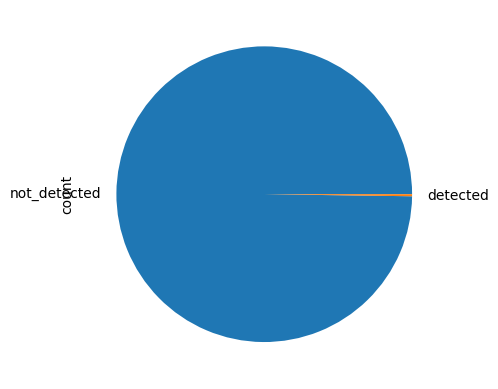

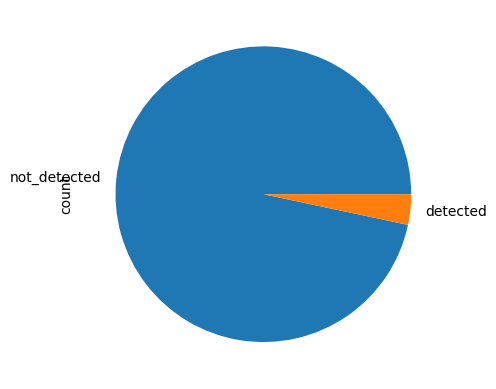

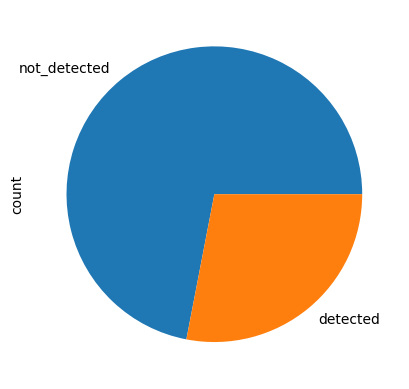

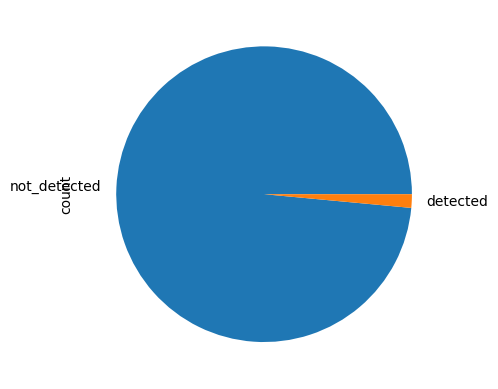

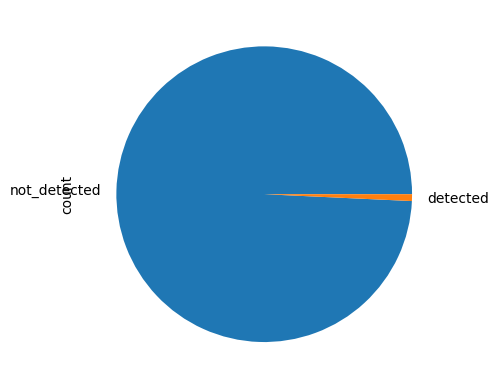

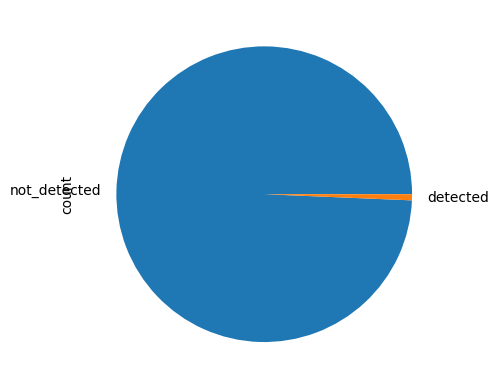

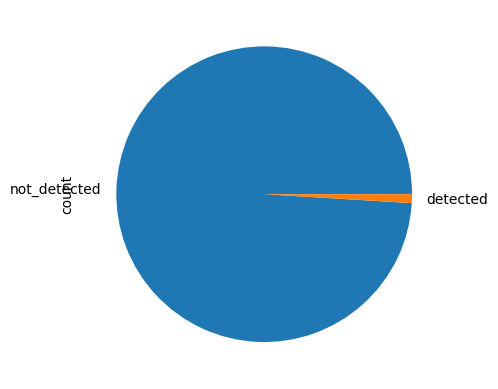

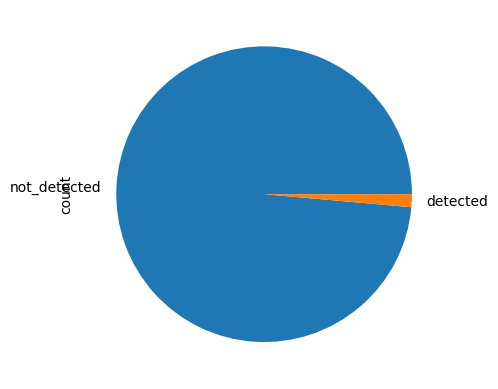

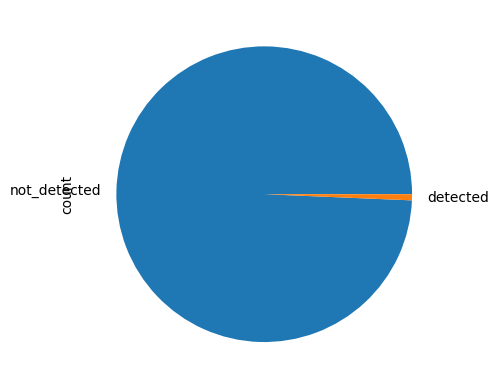

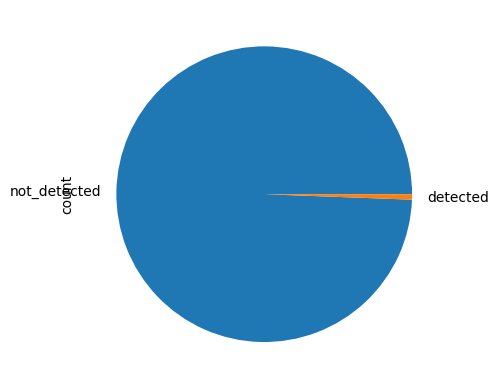

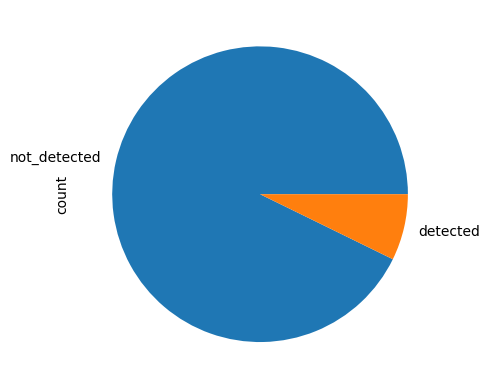

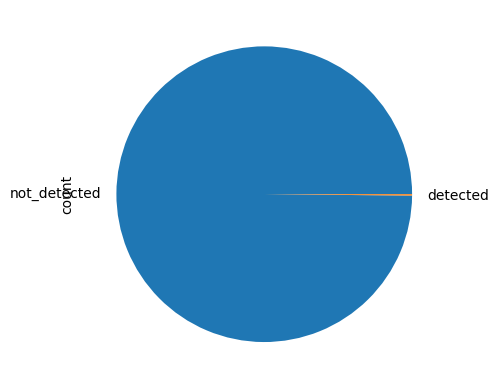

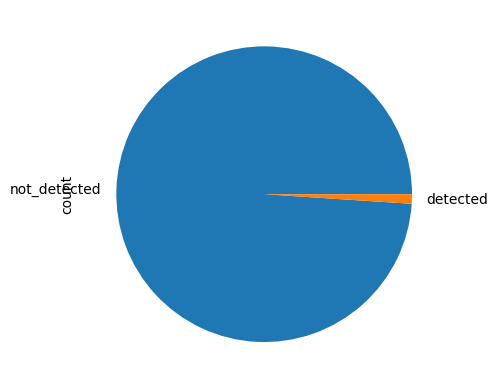

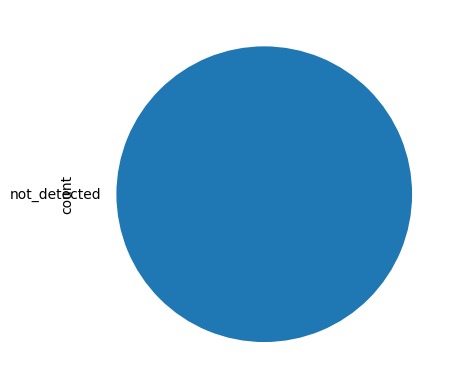

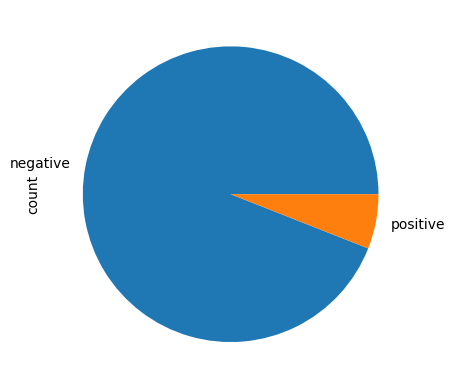

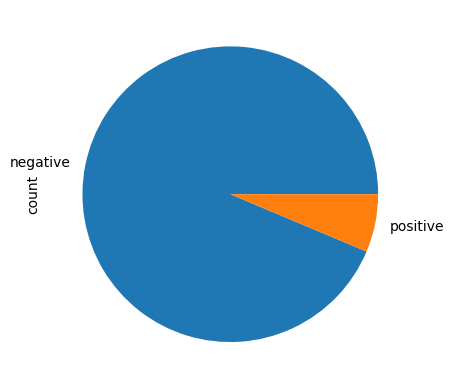

In [16]:
for col in df.select_dtypes('object'):
    
    plt.figure()
    df[col].value_counts().plot.pie()

#Rhinovirus/Enterovirus contient postive beaucoup par rapport a les autre 

In [17]:
# la maintenant on vas visualiser la relation entre le v ariable target 
positive_df=df[df['SARS-Cov-2 exam result']=='positive']

C:\Users\Eddebi\AppData\Local\Temp\ipykernel_2412\2498676515.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='postive')
C:\Users\Eddebi\AppData\Local\Temp\ipykernel_2412\2498676515.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col],label='negative')
C

<Axes: xlabel='Red blood cell distribution width (RDW)', ylabel='Count'>

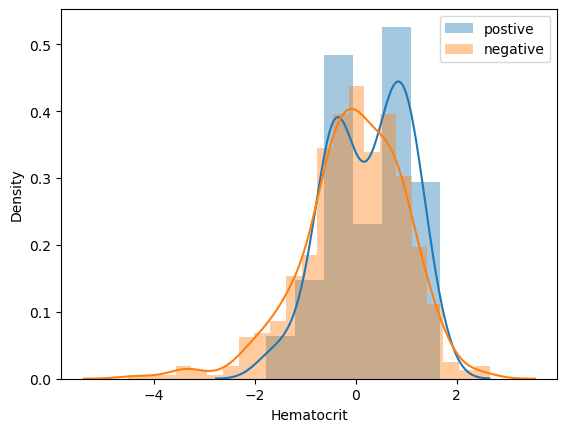

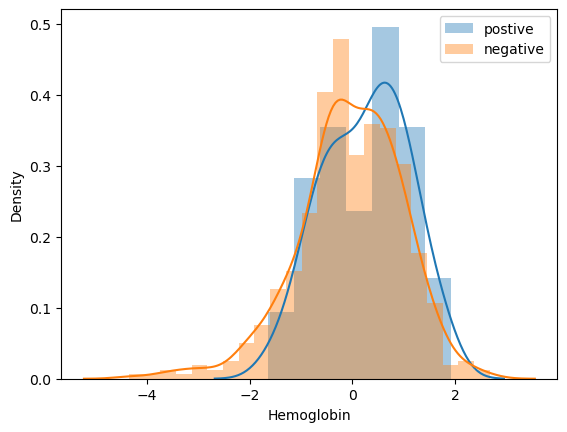

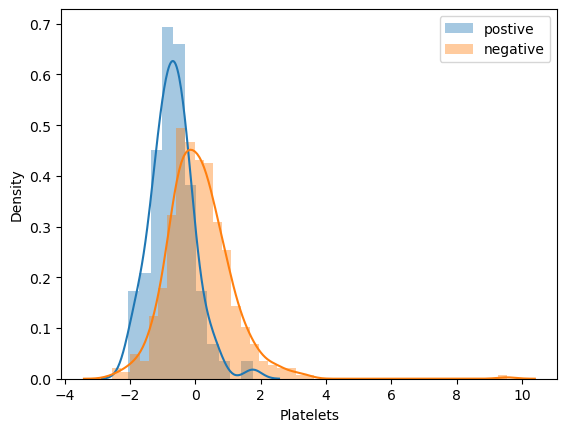

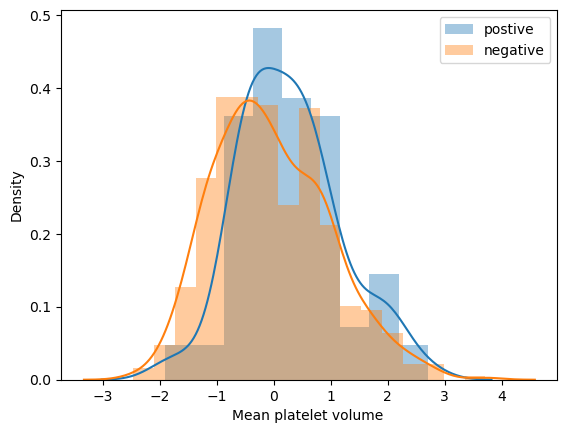

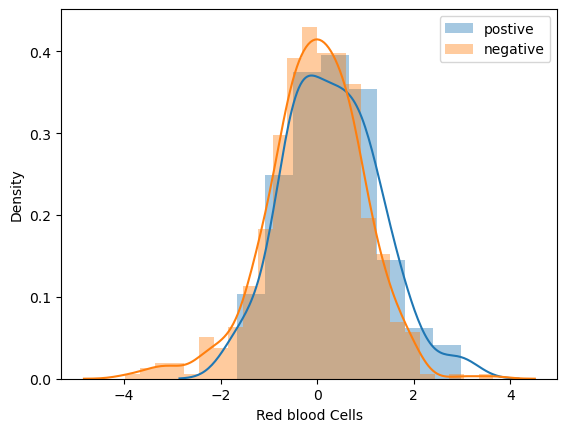

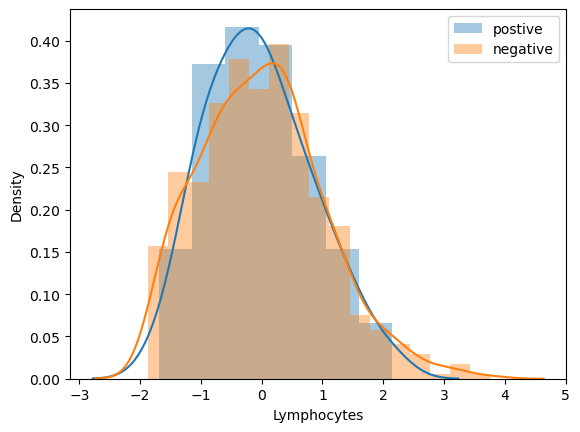

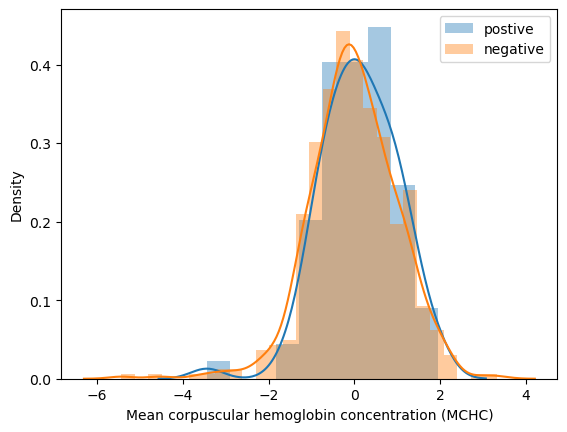

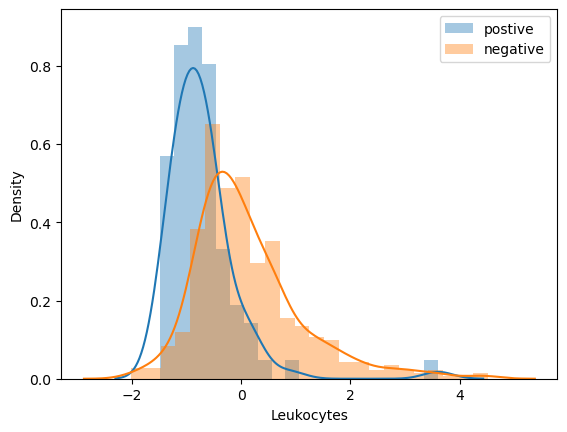

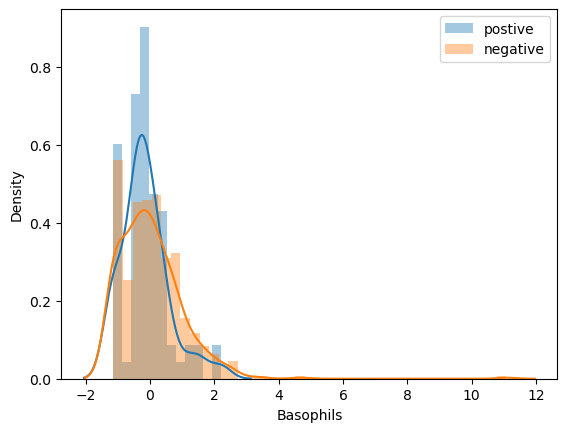

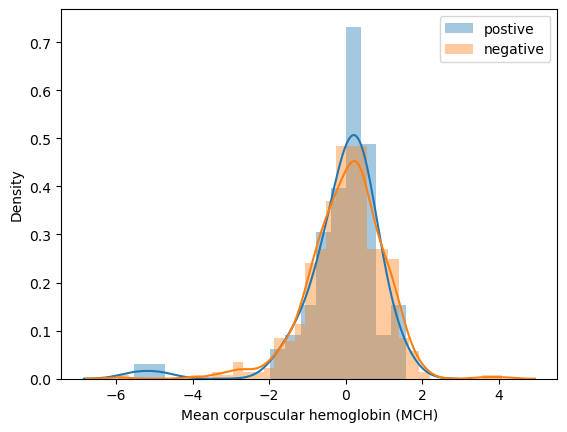

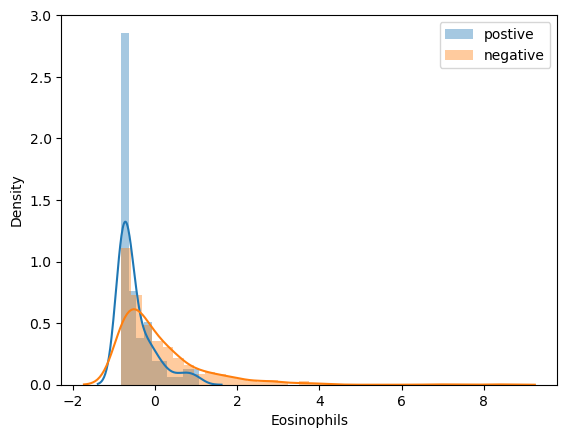

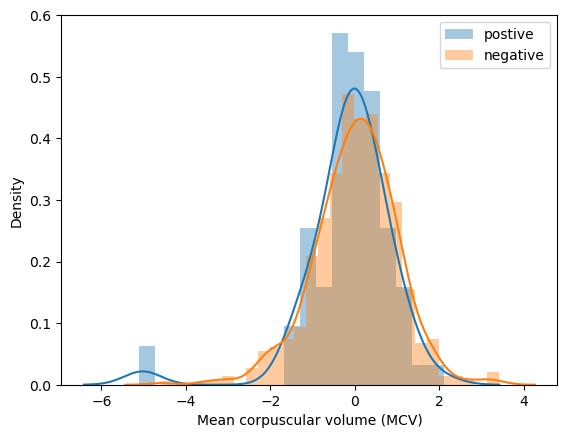

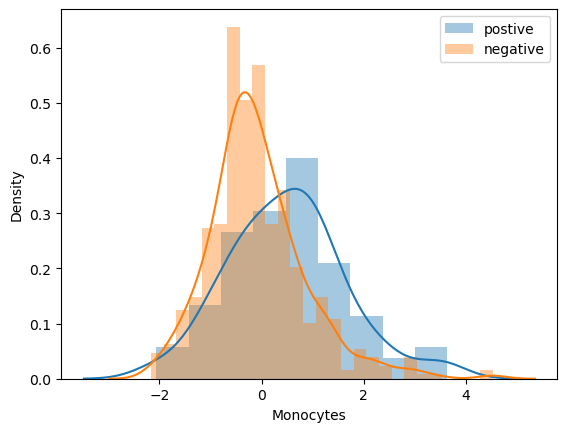

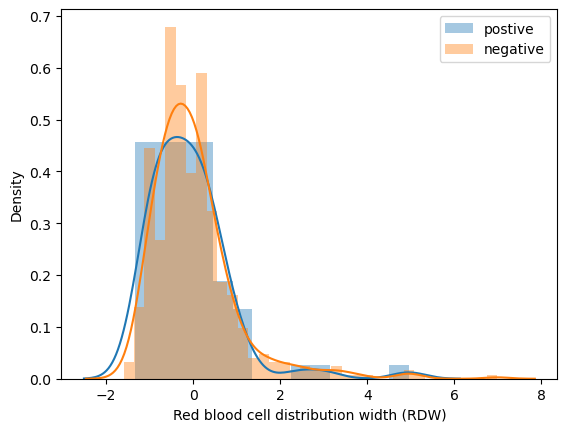

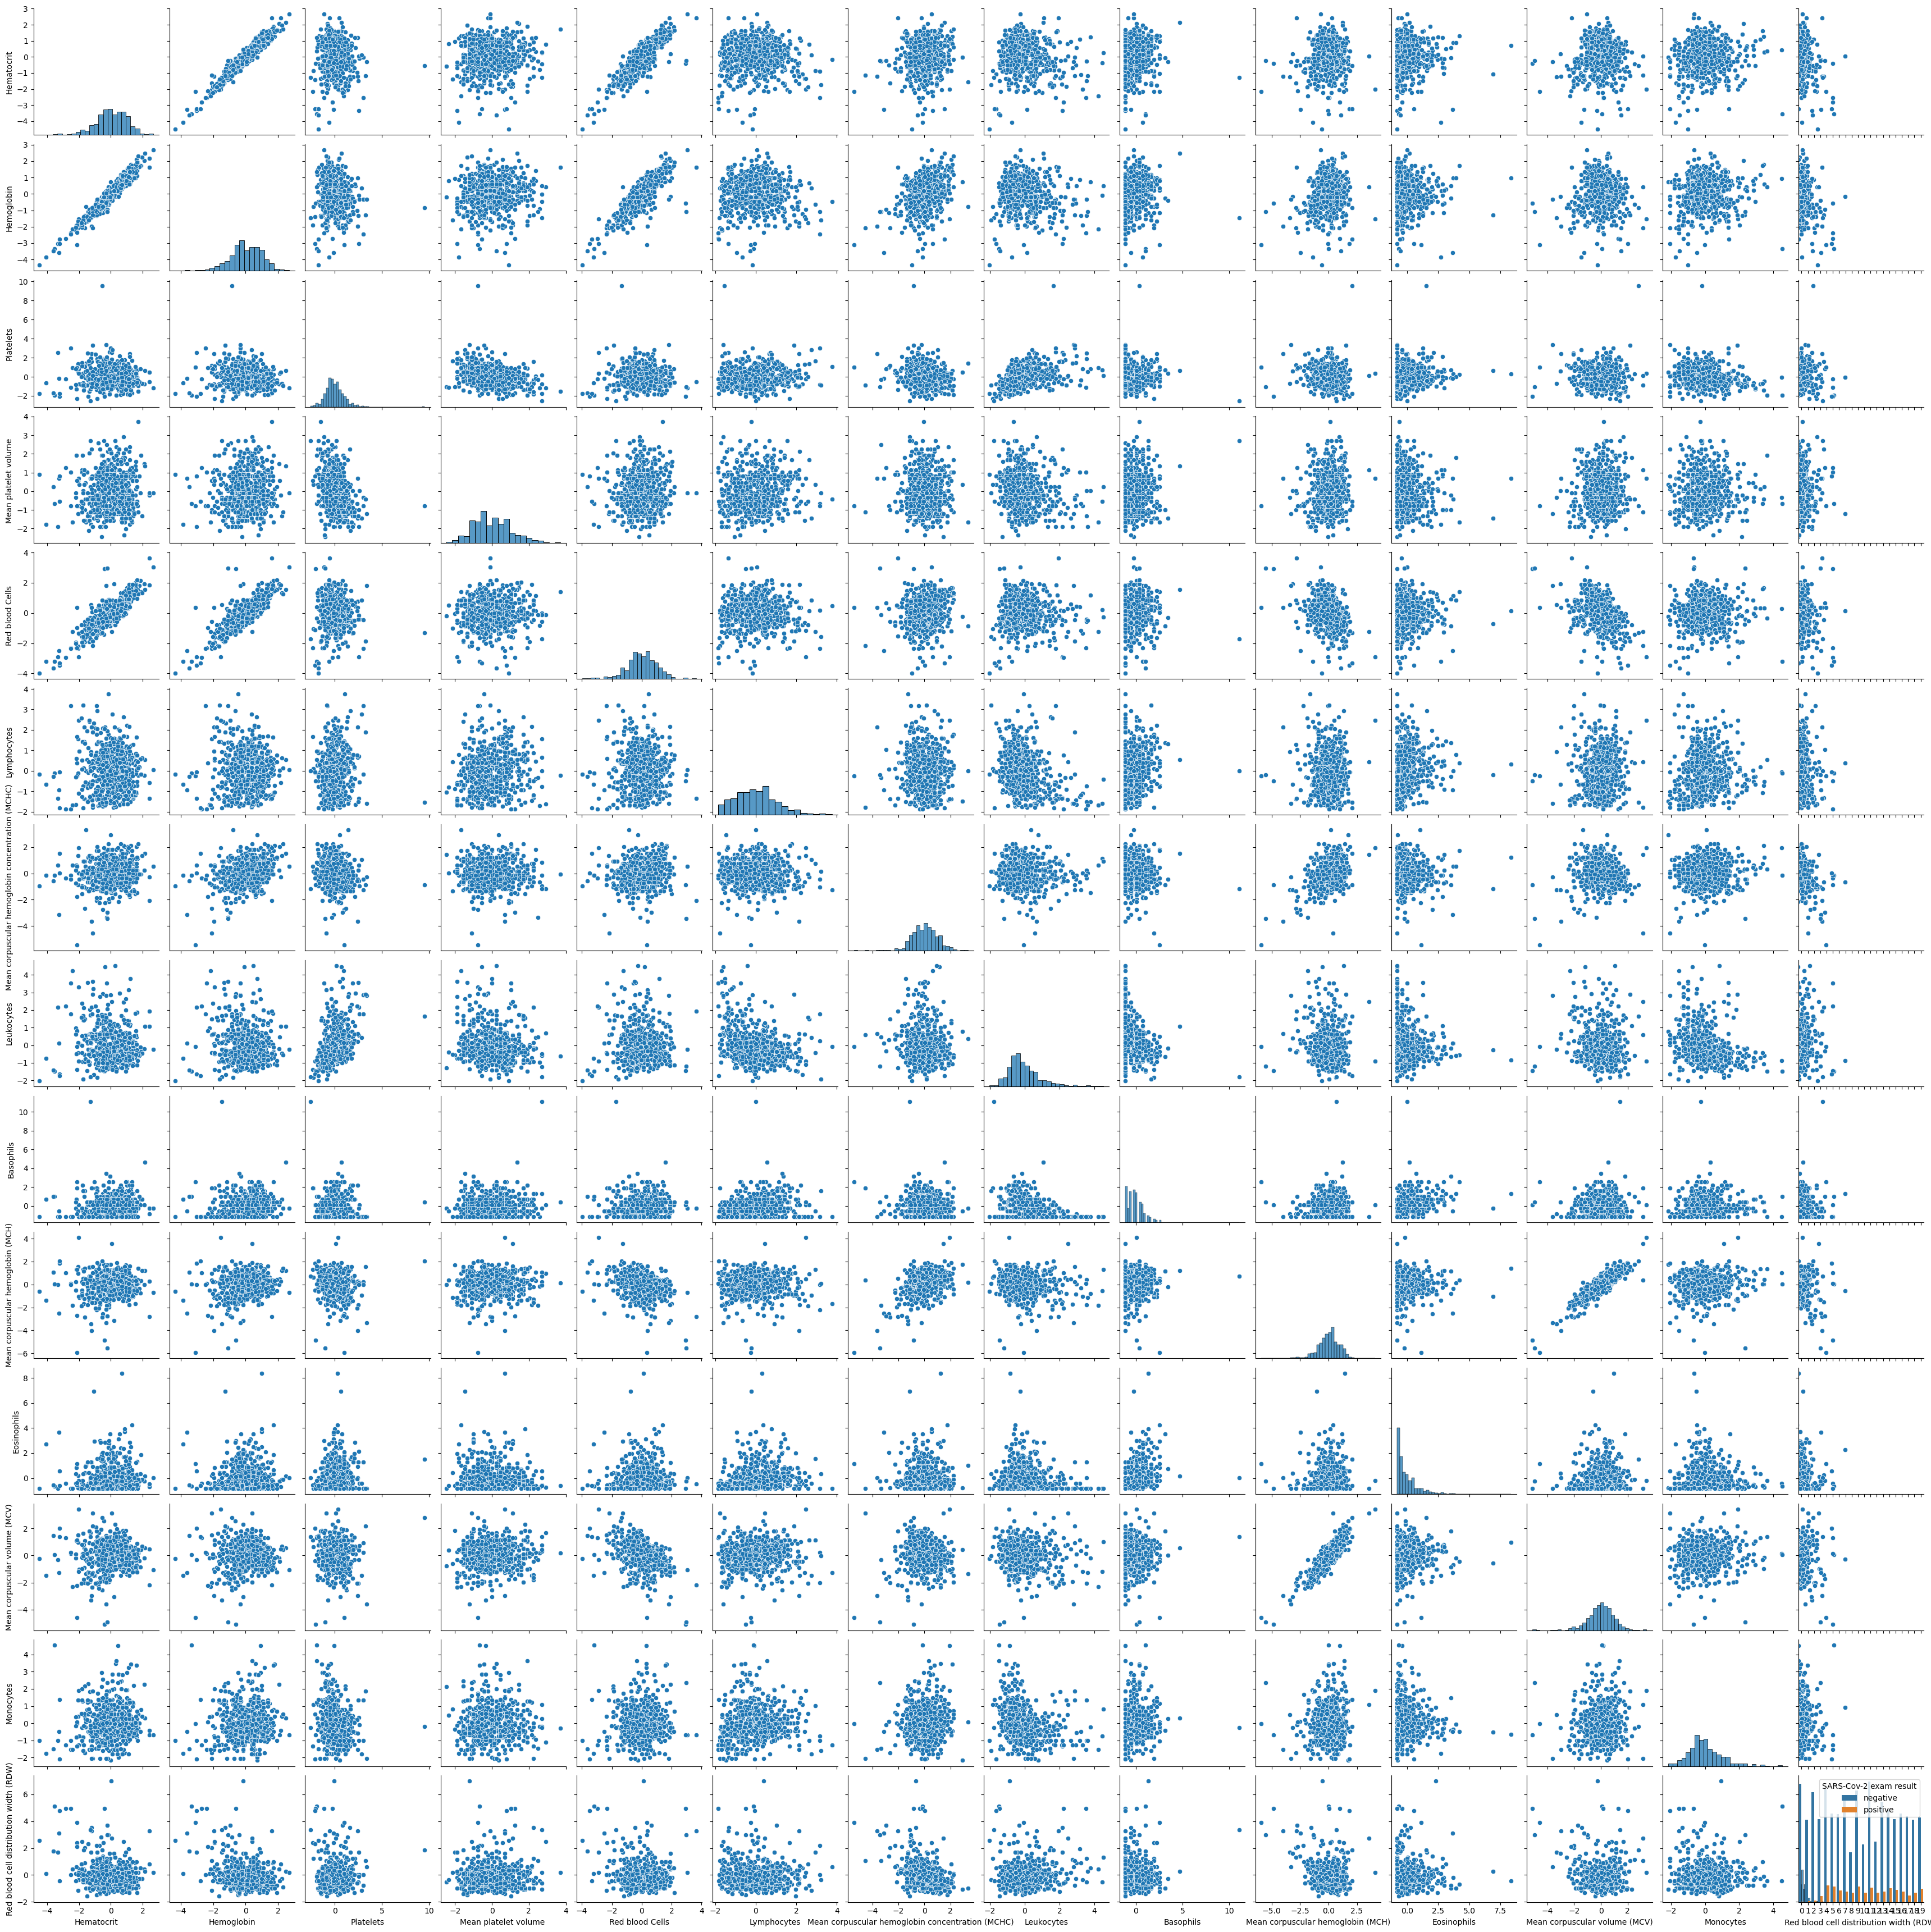

In [18]:
negative_df=df[df['SARS-Cov-2 exam result']=='negative']
missing_percentage=df.isna().sum()/df.shape[0]
blood_columns=df.columns[(missing_percentage < 0.9) & (missing_percentage >0.88)]
viral_columns=df.columns[(missing_percentage < 0.88) & (missing_percentage >0.77)]
for col in blood_columns :
    plt.figure()
    sns.distplot(positive_df[col],label='postive')
    sns.distplot(negative_df[col],label='negative')
    plt.legend()

sns.pairplot(df[blood_columns])
# on trouve que il ya des variable diffrent en terme de negative et postive : Monocytes - leukocytes- platlets
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)


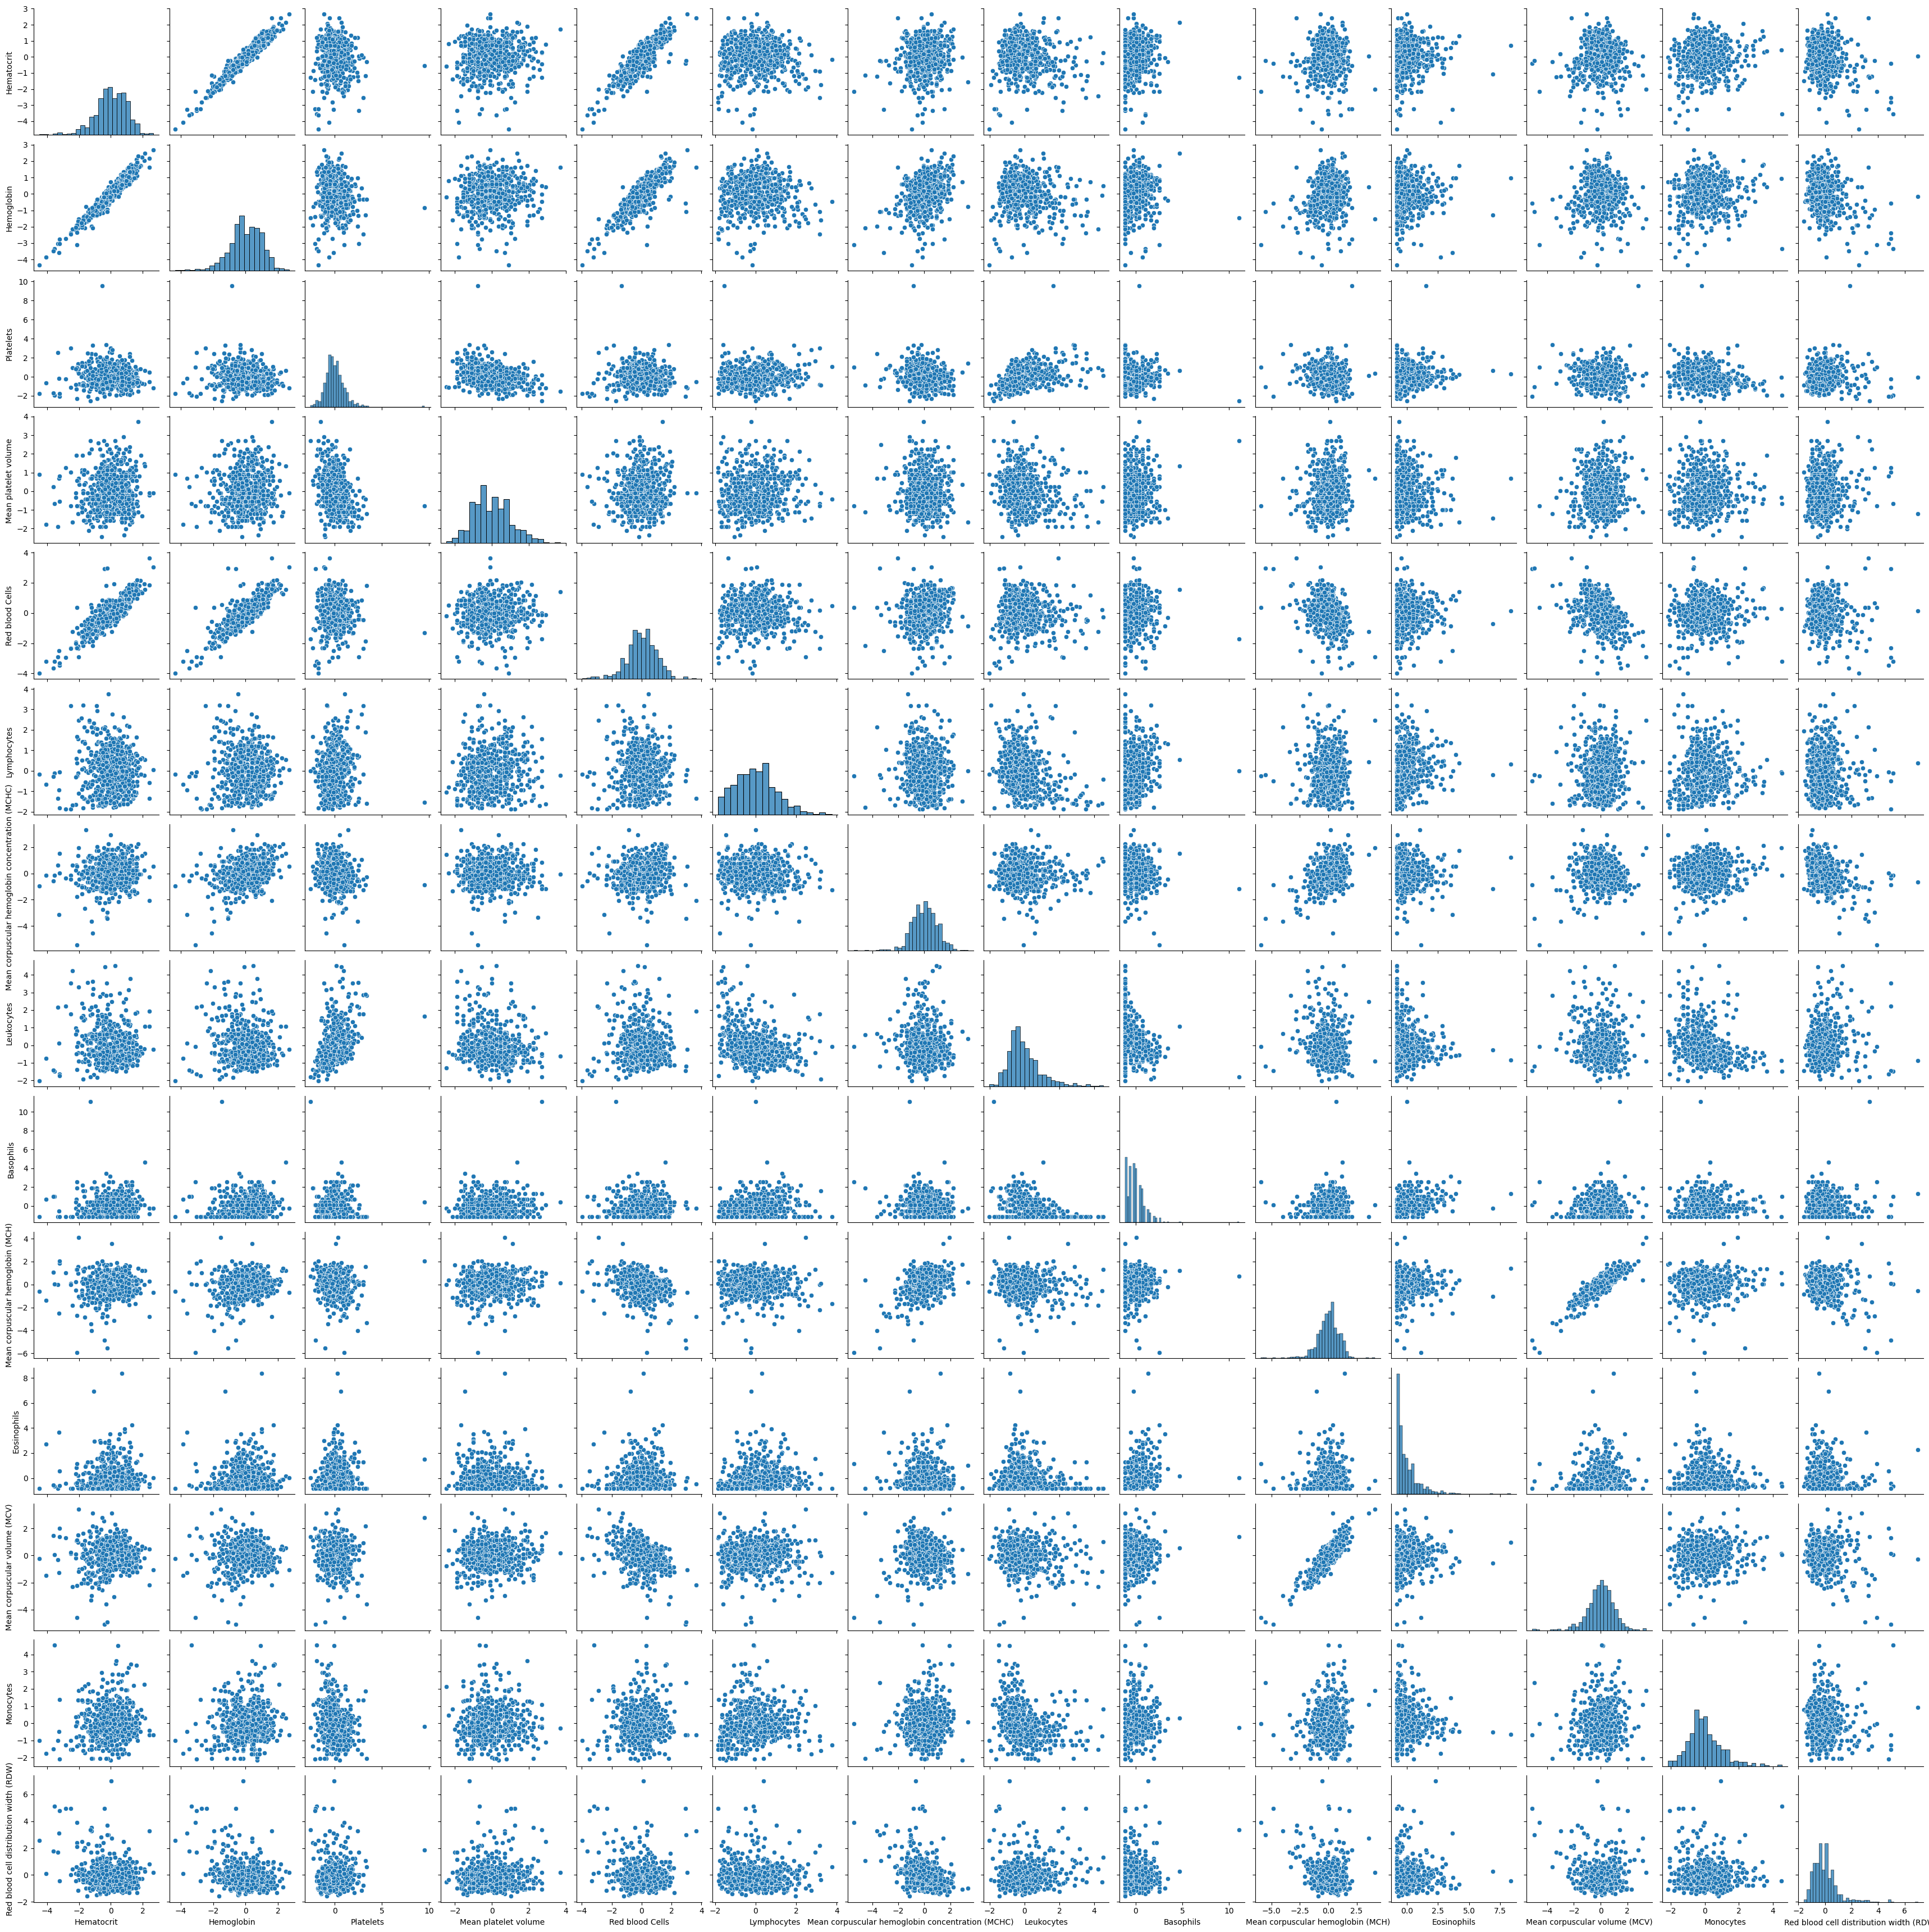

In [19]:
sns.pairplot(df[blood_columns])

<Axes: xlabel='Patient age quantile', ylabel='count'>

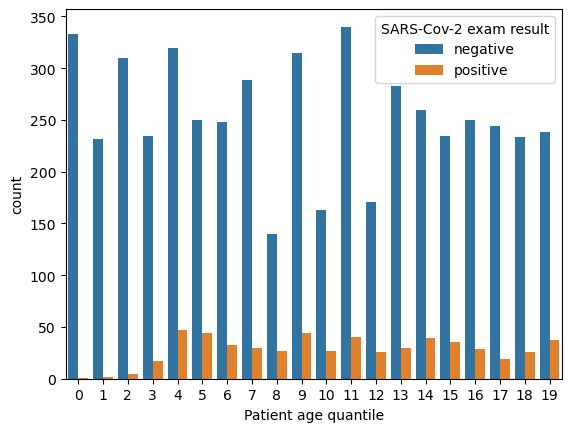

In [20]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

<Axes: >

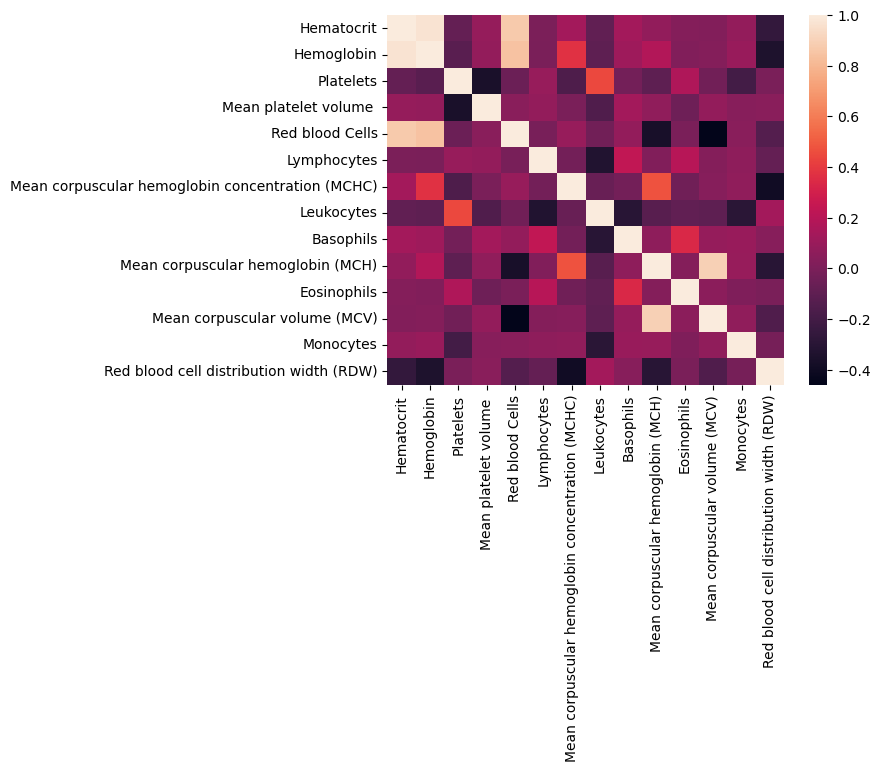

In [21]:
sns.heatmap(df[blood_columns].corr())

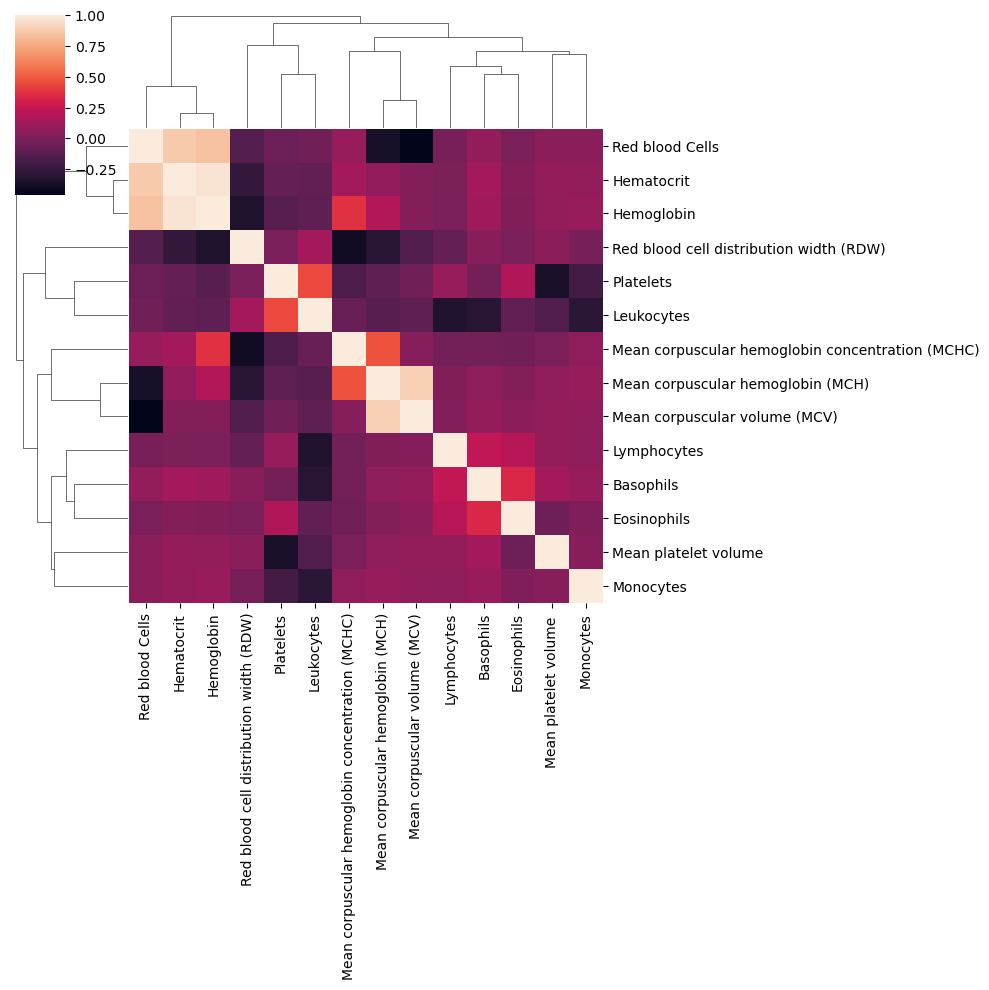

In [22]:
sns.clustermap(df[blood_columns].corr())

In [23]:
# preprosessing
df1=data.copy()
print(df1.shape)
missing_percentage=df1.isna().sum()/df.shape[0]
blood_columns=list(df1.columns[(missing_percentage < 0.9) & (missing_percentage >0.88)])

viral_columns=list(df1.columns[(missing_percentage < 0.80) & (missing_percentage >0.75)])


key_columns=['SARS-Cov-2 exam result','Patient age quantile']
df1=df1[key_columns + blood_columns + viral_columns]
print(df1.columns)
print(df1.shape)



(5644, 111)
Index(['SARS-Cov-2 exam result', 'Patient age quantile', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2'],
      dtype='object')
(5644, 33)


In [24]:
from sklearn.model_selection import train_test_split

trainset, testset=train_test_split(df1,test_size=0.2,random_state=0)

trainset['SARS-Cov-2 exam result'].value_counts()



SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [25]:
testset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

In [26]:
#nettoyage du data
# encodeage 

def encodage(df1):
    
    code={'positive':1,'negative':0,'detected':1,'not_detected':0,'False':0,'True':1}
    for col in df1.select_dtypes('object'):
        df1[col]=df[col].map(code)
    for col in df1.select_dtypes('bool'):
        df1[col] = df1[col].astype(int)
        
        
    return df1  
encodage(df1)


SARS-Cov-2 exam result  Patient age quantile  Hematocrit  Hemoglobin  \
0                          0                    13         NaN         NaN   
1                          0                    17    0.236515   -0.022340   
2                          0                     8         NaN         NaN   
3                          0                     5         NaN         NaN   
4                          0                    15         NaN         NaN   
...                      ...                   ...         ...         ...   
5639                       1                     3         NaN         NaN   
5640                       0                    17         NaN         NaN   
5641                       0                     4         NaN         NaN   
5642                       0                    10         NaN         NaN   
5643                       1                    19    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0           NaN                    NaN              NaN          NaN   
1     -0.517413               0.010677         0.102004     0.318366   
2           NaN                    NaN              NaN          NaN   
3           NaN                    NaN              NaN          NaN   
4           NaN                    NaN              NaN          NaN   
...         ...                    ...              ...          ...   
5639        NaN                    NaN              NaN          NaN   
5640        NaN                    NaN              NaN          NaN   
5641        NaN                    NaN              NaN          NaN   
5642        NaN                    NaN              NaN          NaN   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                                  NaN         NaN        NaN   
1                                            -0.950790   -0.094610  -0.223767   
2                                                  NaN         NaN        NaN   
3                                                  NaN         NaN        NaN   
4                                                  NaN         NaN        NaN   
...                                                ...         ...        ...   
5639                                               NaN         NaN        NaN   
5640                                               NaN         NaN        NaN   
5641                                               NaN         NaN        NaN   
5642                                               NaN         NaN        NaN   
5643                                         -0.353319   -1.288428  -1.140144   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                   NaN          NaN   
1                             -0.292269     1.482158   
2                                   NaN          NaN   
3                                   NaN          NaN   
4                                   NaN          NaN   
...                                 ...          ...   
5639                                NaN          NaN   
5640                                NaN          NaN   
5641                                NaN          NaN   
5642                                NaN          NaN   
5643                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
0                               NaN        NaN   
1                          0.166192   0.357547   
2                               NaN        NaN   
3                               NaN        NaN   
4                               NaN        NaN   
...                             ...        ...   
5639                            NaN        NaN   
5640                            NaN        NaN   
5641                            NaN        NaN   
5642                            NaN        NaN   
5643    

In [27]:
def feature_enginnering(df1): 
    df1['est malade']=(df1[viral_columns].sum(axis=1)) >= 1
    df1=df1.drop(viral_columns,axis=1)
    return df1
encodage(df1)
feature_enginnering(df1)
encodage(df1)


SARS-Cov-2 exam result  Patient age quantile  Hematocrit  Hemoglobin  \
0                          0                    13         NaN         NaN   
1                          0                    17    0.236515   -0.022340   
2                          0                     8         NaN         NaN   
3                          0                     5         NaN         NaN   
4                          0                    15         NaN         NaN   
...                      ...                   ...         ...         ...   
5639                       1                     3         NaN         NaN   
5640                       0                    17         NaN         NaN   
5641                       0                     4         NaN         NaN   
5642                       0                    10         NaN         NaN   
5643                       1                    19    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0           NaN                    NaN              NaN          NaN   
1     -0.517413               0.010677         0.102004     0.318366   
2           NaN                    NaN              NaN          NaN   
3           NaN                    NaN              NaN          NaN   
4           NaN                    NaN              NaN          NaN   
...         ...                    ...              ...          ...   
5639        NaN                    NaN              NaN          NaN   
5640        NaN                    NaN              NaN          NaN   
5641        NaN                    NaN              NaN          NaN   
5642        NaN                    NaN              NaN          NaN   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                                  NaN         NaN        NaN   
1                                            -0.950790   -0.094610  -0.223767   
2                                                  NaN         NaN        NaN   
3                                                  NaN         NaN        NaN   
4                                                  NaN         NaN        NaN   
...                                                ...         ...        ...   
5639                                               NaN         NaN        NaN   
5640                                               NaN         NaN        NaN   
5641                                               NaN         NaN        NaN   
5642                                               NaN         NaN        NaN   
5643                                         -0.353319   -1.288428  -1.140144   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                   NaN          NaN   
1                             -0.292269     1.482158   
2                                   NaN          NaN   
3                                   NaN          NaN   
4                                   NaN          NaN   
...                                 ...          ...   
5639                                NaN          NaN   
5640                                NaN          NaN   
5641                                NaN          NaN   
5642                                NaN          NaN   
5643                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
0                               NaN        NaN   
1                          0.166192   0.357547   
2                               NaN        NaN   
3                               NaN        NaN   
4                               NaN        NaN   
...                             ...        ...   
5639                            NaN        NaN   
5640                            NaN        NaN   
5641                            NaN        NaN   
5642                            NaN        NaN   
5643    

In [28]:
def imputation(df1): 
    df1=df1.dropna(axis=0)
    return df1



In [29]:
# Ensure all columns in viral_columns are numeric


In [30]:
def preprocessing(df1):
    df1=encodage(df1)
    df1=feature_enginnering(df1)
    df1=imputation(df1)
    y = df1['SARS-Cov-2 exam result']
    X = df1.drop('SARS-Cov-2 exam result',axis=1)
    
    print(y.value_counts())
    return X,y


   

In [31]:
X_train , y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [32]:
X_test,y_test=preprocessing(testset)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


RandomForest
[[90  5]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        95
           1       0.50      0.31      0.38        16

    accuracy                           0.86       111
   macro avg       0.70      0.63      0.65       111
weighted avg       0.83      0.86      0.84       111

AdaBoost
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



C:\Users\Eddebi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Eddebi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Eddebi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Eddebi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

SVM
[[91  4]
 [12  4]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        95
           1       0.50      0.25      0.33        16

    accuracy                           0.86       111
   macro avg       0.69      0.60      0.63       111
weighted avg       0.83      0.86      0.83       111

KNN
[[90  5]
 [12  4]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        95
           1       0.44      0.25      0.32        16

    accuracy                           0.85       111
   macro avg       0.66      0.60      0.62       111
weighted avg       0.82      0.85      0.83       111



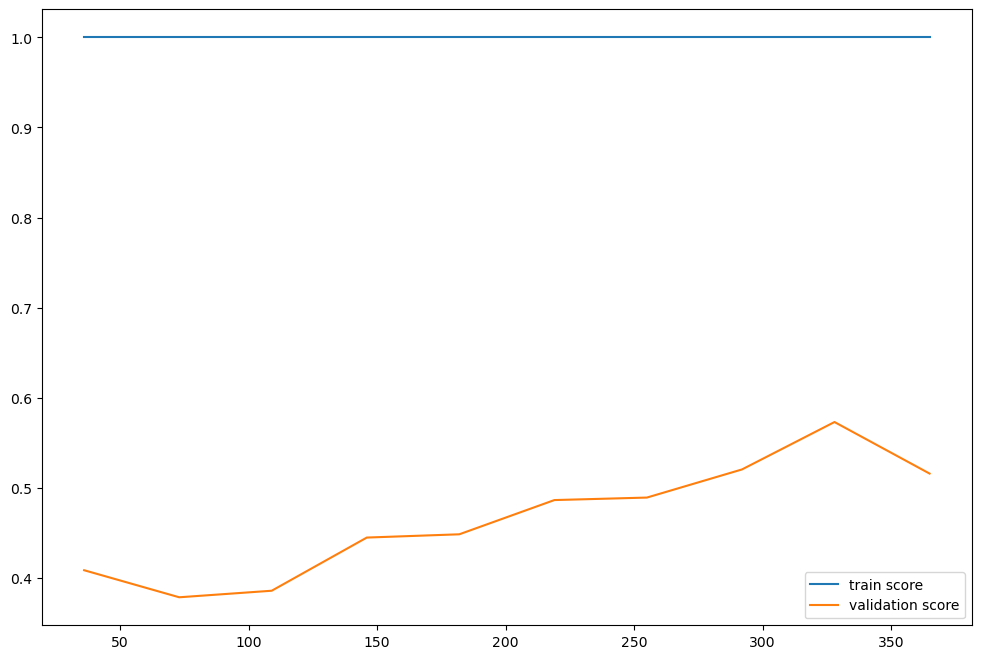

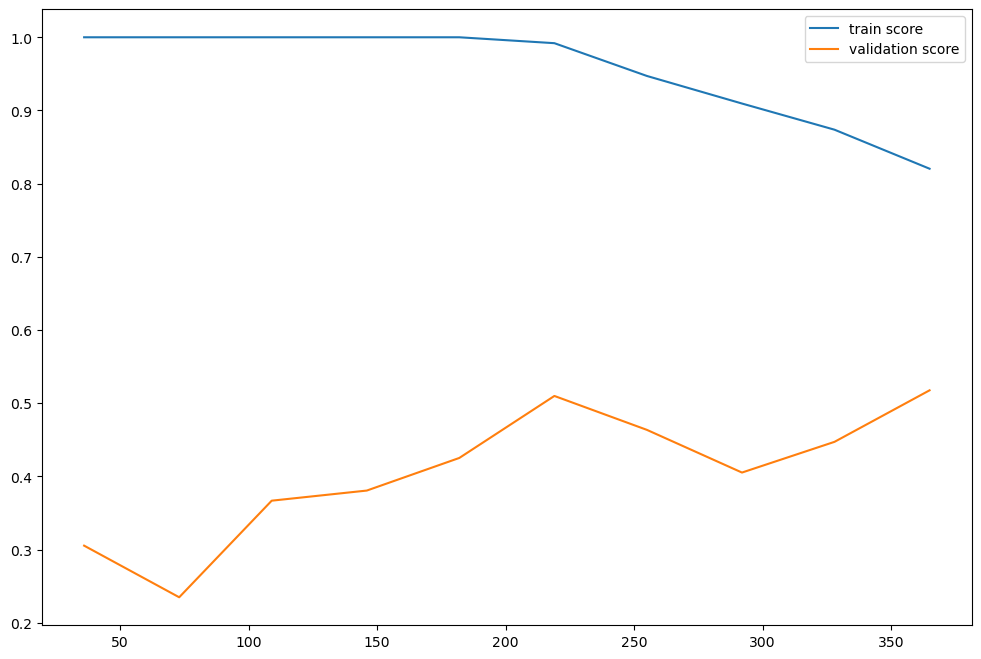

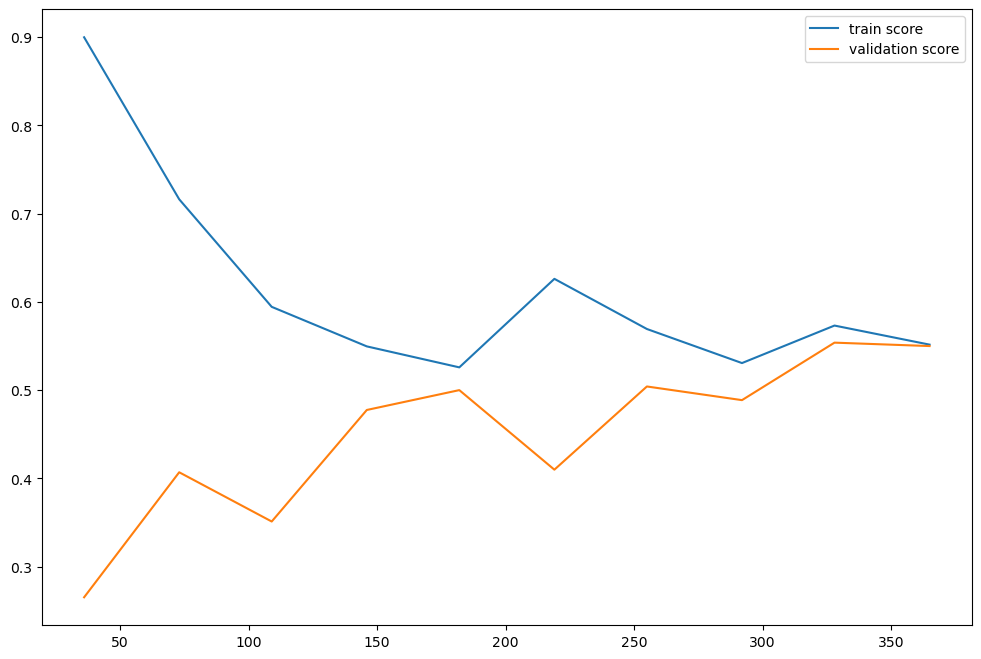

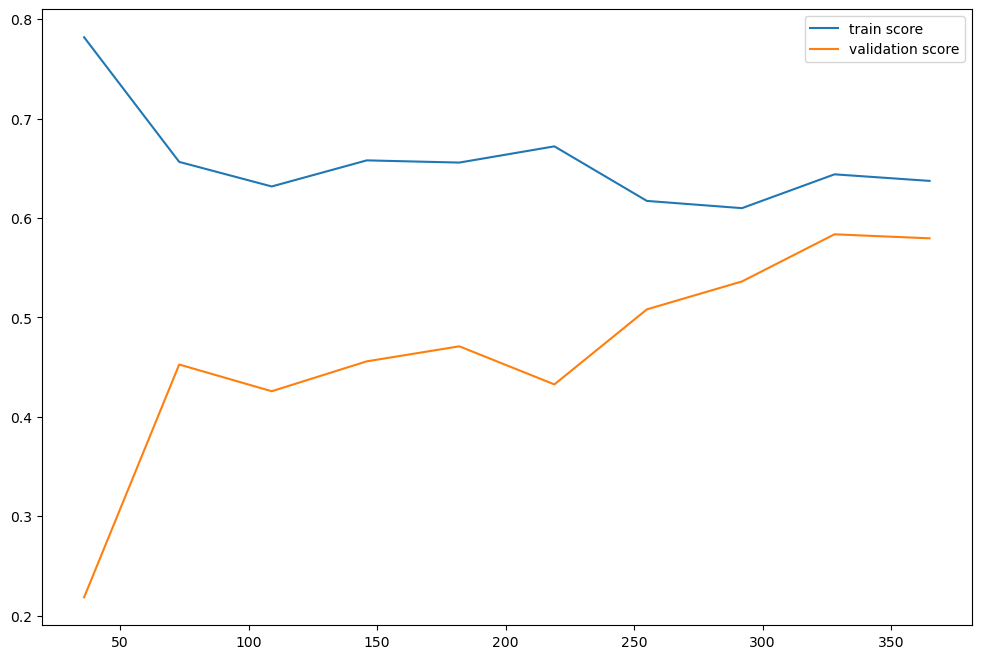

In [33]:
# Modelisation 

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline 
from sklearn.feature_selection import SelectKBest,f_classif 
from sklearn.preprocessing import PolynomialFeatures ,StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

def evaluation(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()
preprocessor=make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=5))
RandomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost=make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))
KNN=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())
list_of_model={'RandomForest':RandomForest,'AdaBoost':AdaBoost,'SVM':SVM,'KNN':KNN}
for name,model in list_of_model.items(): 
    print(name)
    evaluation(model)
#Procedure d'evaluation 



    
   
    
###### overfitting car train score il a 100 pour cent de f1 score 


In [34]:
import pandas as pd
pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))
# on trouve que 

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 21, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111

[[90  5]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



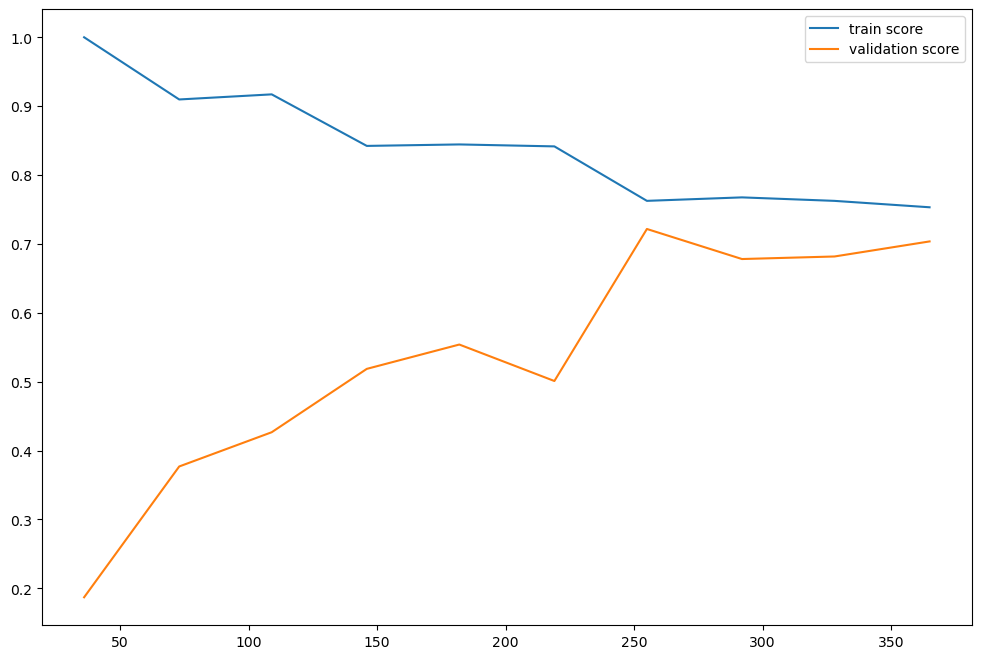

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
hyper_params={
    'svc__gamma':[1e-3,1e-4],
    'svc__C':[1,10,100,1000],
    'pipeline__polynomialfeatures__degree':[2,3,4],
    'pipeline__selectkbest__k':range(4,100)}
grid=RandomizedSearchCV(SVM,hyper_params,scoring='recall',cv=4,n_iter=40)
grid.fit(X_train,y_train)
print(grid.best_params_)
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))
evaluation(grid.best_estimator_)

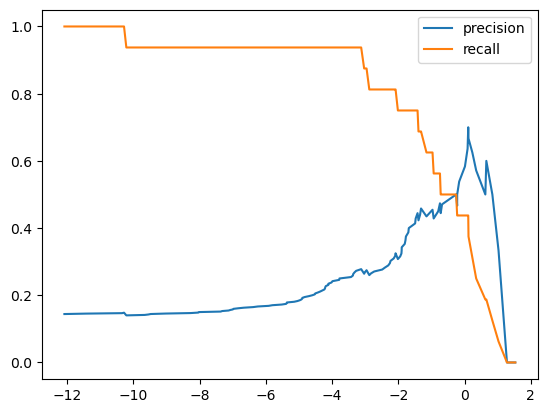

In [37]:
# Precision Recall Curve 
from sklearn.metrics import precision_recall_curve 
#seuil de precision 
precision,recall,threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))
plt.plot(threshold,precision[:-1],label='precision')
plt.plot(threshold,recall[:-1],label='recall')
plt.legend()

In [95]:
def model_final(model,X,threshold=0):
    return model.decision_function(X)>threshold

y_pred=model_final(grid.best_estimator_,X_test,threshold=-1.5)

In [97]:
from sklearn.metrics import recall_score

f1_score(y_test,y_pred)

0.5333333333333333

In [99]:
recall_score(y_test,y_pred)

0.75